In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/5-8-13-14.iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

<AxesSubplot: xlabel='sepal.length', ylabel='Count'>

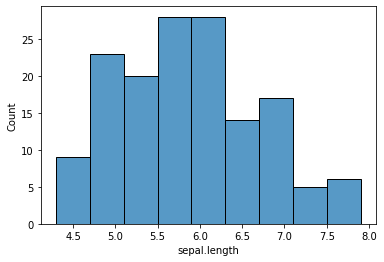

In [6]:
sns.histplot(x=df['sepal.length'])

(array([48.,  2., 10., 26., 30., 17., 17.]),
 array([0.1       , 0.44285714, 0.78571429, 1.12857143, 1.47142857,
        1.81428571, 2.15714286, 2.5       ]),
 <BarContainer object of 7 artists>)

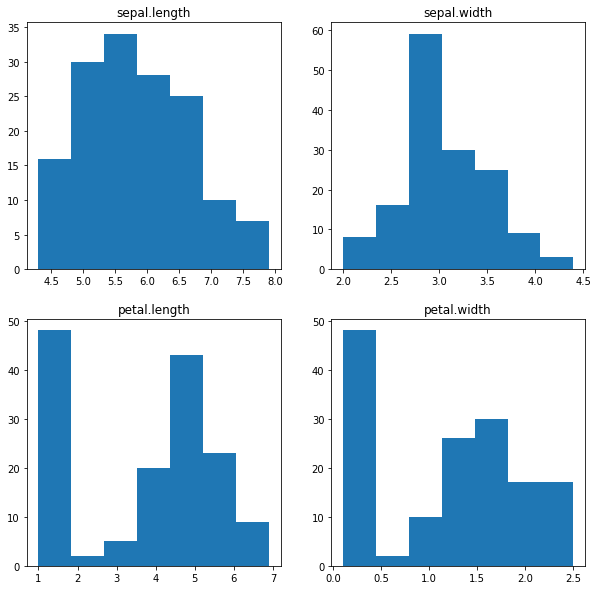

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title('sepal.length')
axes[0,0].hist(df['sepal.length'],bins=7)

axes[0,1].set_title('sepal.width')
axes[0,1].hist(df['sepal.width'],bins=7)

axes[1,0].set_title('petal.length')
axes[1,0].hist(df['petal.length'],bins=7)

axes[1,1].set_title('petal.width')
axes[1,1].hist(df['petal.width'],bins=7)

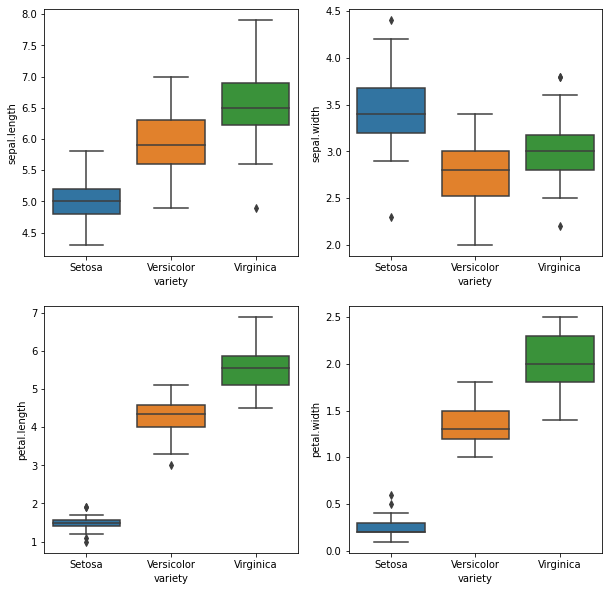

In [8]:
def graph(y):
    sns.boxplot(x="variety", y=y, data=df)

plt.figure(figsize=(10,10))
plt.subplot(221)

graph('sepal.length')
plt.subplot(222)

graph('sepal.width')
plt.subplot(223)

graph('petal.length')
plt.subplot(224)

graph('petal.width')
plt.show()

<AxesSubplot: xlabel='sepal.width'>

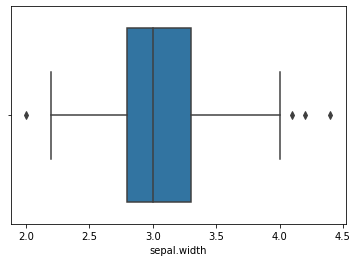

In [9]:
sns.boxplot(x='sepal.width', data=df)

Old Shape:  (150, 5)
New Shape:  (146, 5)


C:\Users\Nijgururaj\AppData\Local\Temp\ipykernel_27496\2686904184.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['sepal.width'], 25, interpolation = 'midpoint')
C:\Users\Nijgururaj\AppData\Local\Temp\ipykernel_27496\2686904184.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['sepal.width'], 75, interpolation = 'midpoint')


<AxesSubplot: xlabel='sepal.width'>

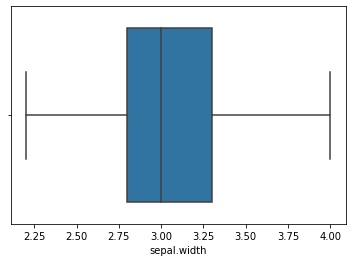

In [10]:
Q1 = np.percentile(df['sepal.width'], 25, interpolation = 'midpoint')

Q3 = np.percentile(df['sepal.width'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
upper = np.where(df['sepal.width'] >= (Q3+1.5*IQR))
lower = np.where(df['sepal.width'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepal.width', data=df)